# Emotion Recognition
## CS 4662: Advanced Machine Learning and Deep Learning
## Bryan Bee, Paul El-Hosni, Edward Eckle, Jacky Man, Melissa Hernandez

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import keras

2024-05-09 17:26:02.188546: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 17:26:02.188772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 17:26:02.207654: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 17:26:02.287288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 17:26:03.815864: W tensorflow/compiler/tf2

# 1 Data Preprocessing

In [2]:
import os 

train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

for train_folder in train:
    count = 0

    # iterate through each emotion folder containing images
    for emot in emotions:
        path = f'./{train_folder}/{emot}'
        
        # count the number of files inside the folder
        file_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        count += file_count
        print(f'  {emot}: {file_count}')

    print(f'files in {train_folder}: {count}')
    print()

  angry: 3995
  disgusted: 436
  fearful: 4097
  happy: 7215
  neutral: 4965
  sad: 4830
  surprised: 3171
files in train: 28709



In [3]:
# constants about our data
TRAIN_SIZE = 28709
IMAGE_LENGTH = 48

DATASET_SIZE = TRAIN_SIZE
IMAGE_PIXELS = IMAGE_LENGTH ** 2

In [4]:
import matplotlib.image as mpimg

# these are the directories that we read from
test_train = ["train"]
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# initialize empty arrays; data for the pixels and different labels
data = np.empty((DATASET_SIZE, IMAGE_PIXELS))
tt_labels = np.empty(DATASET_SIZE, dtype=object)
emotion_labels = np.empty(DATASET_SIZE, dtype=object)

i = 0
for tt in test_train:
    for emotion in emotions:
        # iterate through all the folders
        directory = f'./{tt}/{emotion}'
        
        for filename in os.listdir(directory):
            fpath = os.path.join(directory, filename)
            
            # flatten the image into 1d and save it to our numpy data array
            data[i] = mpimg.imread(fpath).flatten() 

            emotion_labels[i] = emotion
            i += 1

In [5]:
data

array([[0.04313726, 0.04313726, 0.04313726, ..., 0.14117648, 0.13333334,
        0.13725491],
       [0.39607844, 0.4627451 , 0.49411765, ..., 0.19215687, 0.2       ,
        0.19215687],
       [0.14509805, 0.07058824, 0.04705882, ..., 0.10980392, 0.11372549,
        0.11372549],
       ...,
       [0.39215687, 0.40000001, 0.40000001, ..., 0.72549021, 0.71764708,
        0.68627453],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.29803923, 0.26666668,
        0.27450982],
       [0.20392157, 0.19215687, 0.19607843, ..., 0.73333335, 0.57254905,
        0.72549021]])

In [6]:
from sklearn import preprocessing

# normalize/scale the data
data = preprocessing.scale(data)
data

array([[-1.32534425, -1.31071937, -1.29267943, ..., -0.99149993,
        -1.01897625, -1.00935005],
       [-0.23396165,  0.00971887,  0.14794677, ..., -0.82339068,
        -0.80101326, -0.83120063],
       [-1.01005593, -1.22433556, -1.28015225, ..., -1.0949518 ,
        -1.08308304, -1.08569983],
       ...,
       [-0.24608813, -0.18772982, -0.15270564, ...,  0.93529086,
         0.89140539,  0.77214431],
       [ 1.62138871,  1.6880329 ,  1.75142636, ..., -0.47424065,
        -0.58305022, -0.56397645],
       [-0.82815884, -0.84177868, -0.80411923, ...,  0.96115383,
         0.41701536,  0.8993939 ]])

In [7]:
# compile the numpy arrays into a dataframe
df = pd.DataFrame(data=data)
df['emotion'] = emotion_labels

In [8]:
train = df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,-1.325344,-1.310719,-1.292679,-1.286891,-1.300224,-1.308662,-1.311067,-1.323348,-1.356176,-0.922161,...,-0.998575,-0.981930,-0.983245,-0.974595,-0.991944,-0.989010,-0.991500,-1.018976,-1.009350,angry
1,-0.233962,0.009719,0.147947,0.054912,-0.045750,0.082825,0.206190,0.241283,0.307038,0.345878,...,0.840454,-0.275860,-0.397332,-0.290573,-0.938947,-0.962821,-0.823391,-0.801013,-0.831201,angry
2,-1.010056,-1.224336,-1.280152,-1.044089,-0.999673,-0.920651,-0.518266,-0.275604,-0.005703,0.331469,...,-0.998575,-0.926552,-0.969620,-0.961183,-0.991944,-1.028294,-1.094952,-1.083083,-1.085700,angry
3,-0.415859,-0.804757,-0.628739,-0.366798,-0.372436,-0.158009,0.028493,0.143494,0.264391,0.345878,...,0.994877,1.163969,1.319530,1.184769,1.035172,1.145427,1.245646,1.327331,1.064818,angry
4,-0.779653,-0.854119,-0.929391,-0.775728,-0.568448,-0.211528,0.137845,0.297163,0.449193,0.634069,...,1.387952,1.440859,1.523918,1.546898,1.565136,0.883532,0.081813,-0.172767,-0.640326,angry


In [9]:
# 2. Data Preprocessing
# Separate features and labels on our datasets 
feature_cols = [x for x in range(48*48)]

X =  train[feature_cols]
y = train["emotion"]

In [10]:
y

0            angry
1            angry
2            angry
3            angry
4            angry
           ...    
28704    surprised
28705    surprised
28706    surprised
28707    surprised
28708    surprised
Name: emotion, Length: 28709, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
print(SVM_y_train.shape)
print(SVM_X_train.shape)

(22967,)
(22967, 2304)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have your labels as a list or array
labels = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder on the labels
encoder.fit(y)

# Transform the labels to numerical representations
y_encoded = encoder.transform(y)

encoded_y_df = pd.DataFrame({'emotion': y_encoded})

encoded_y_df

,emotion
0,0
1,0
2,0
3,0
4,0
...,...
28704,6
28705,6
28706,6
28707,6


In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y_df, test_size=0.3, random_state=2)

X_train_3D = X_train.values.reshape(20096, 48, 48, 1)
X_test_3D = X_test.values.reshape(8613, 48, 48, 1)

print(X_train_3D.shape)
print(X_test_3D.shape)

(20096, 48, 48, 1)
(8613, 48, 48, 1)


In [15]:
from keras import utils as np_utils

# OneHotEncoding for the output label:

y_train_cat = np_utils.to_categorical(y_train, 7)
y_test_cat = np_utils.to_categorical(y_test, 7)

# Label after OneHotEncoding:
print (y_train_cat.shape)
print (y_train_cat[:10, :])

(20096, 7)
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


# 2.1 ANN

In [16]:
# "Sequential" models let us define a stack of neural network layers
from keras import Sequential
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten


input_size = 2304
hidden_neurons = 500
out_size = 7

ANN_model = Sequential()

# first layer: input layer
# Input layer does not do any processing, so no need to define the input layer in this problem.

# -----------------------------------------
# second layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = input_size))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# third layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# fourth layer: hidden layer:
ANN_model.add(Dense(hidden_neurons, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('sigmoid')) # Activation

# -----------------------------------------
# output layer: output layer:
ANN_model.add(Dense(out_size, input_dim = hidden_neurons))  # Neurons
ANN_model.add(Activation('softmax')) # Activation

# compile:
ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2024-05-09 17:26:25.040849: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 17:26:25.402333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 17:26:25.402449: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 17:26:25.410557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-09 17:26:25.410672: I external/local_xla/xla/stream_executor

In [17]:
fitted_ANN_model = ANN_model.fit(X_train, y_train_cat, validation_split=0.33, batch_size=32, epochs=25, verbose=1)

Epoch 1/25


2024-05-09 17:26:28.470485: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-09 17:26:28.665170: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6a38d68bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-09 17:26:28.665217: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-05-09 17:26:28.701639: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 17:26:28.764886: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1715300788.869244  100907 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


421/421 [==============================] - 7s 11ms/step - loss: 1.7223 - accuracy: 0.3128 - val_loss: 1.6567 - val_accuracy: 0.3528
Epoch 2/25
421/421 [==============================] - 4s 9ms/step - loss: 1.6314 - accuracy: 0.3563 - val_loss: 1.6447 - val_accuracy: 0.3328
Epoch 3/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5858 - accuracy: 0.3758 - val_loss: 1.6435 - val_accuracy: 0.3587
Epoch 4/25
421/421 [==============================] - 4s 9ms/step - loss: 1.5412 - accuracy: 0.3960 - val_loss: 1.5920 - val_accuracy: 0.3678
Epoch 5/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4910 - accuracy: 0.4166 - val_loss: 1.6146 - val_accuracy: 0.3780
Epoch 6/25
421/421 [==============================] - 4s 9ms/step - loss: 1.4368 - accuracy: 0.4475 - val_loss: 1.6099 - val_accuracy: 0.3732
Epoch 7/25
421/421 [==============================] - 4s 9ms/step - loss: 1.3811 - accuracy: 0.4687 - val_loss: 1.6389 - val_accuracy: 0.3791
Epoch 8/25
421/4

Text(0.5, 1.0, 'ANN Training and Validation Accuracy')

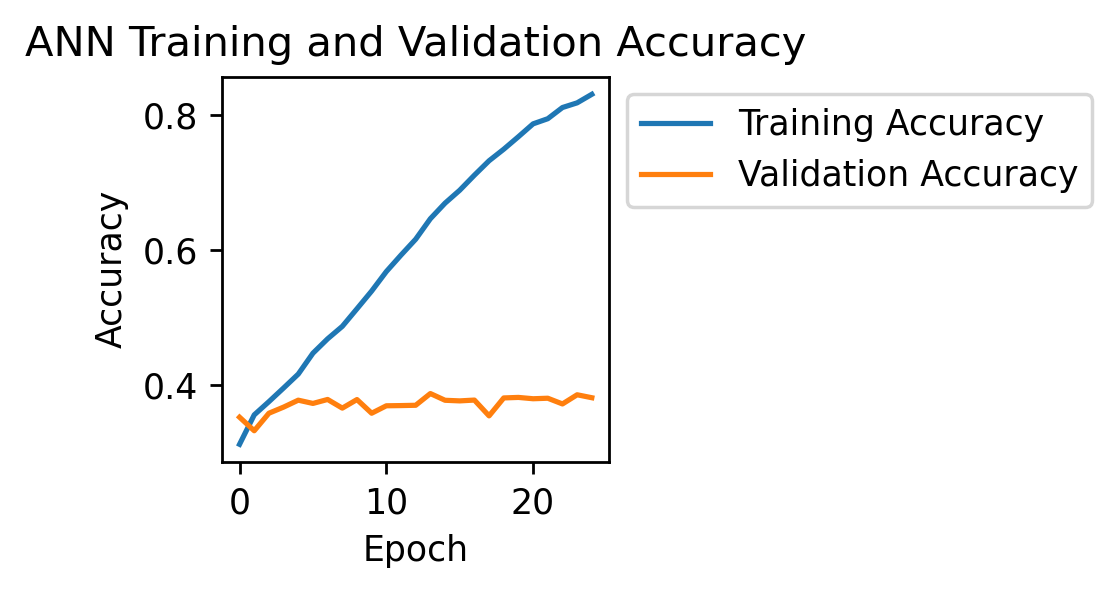

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(fitted_ANN_model.history['accuracy'], label='Training Accuracy')
plt.plot(fitted_ANN_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('ANN Training and Validation Accuracy')

In [19]:
# Prediction:
y_predict = ANN_model.predict(X_test, verbose=1)
print (y_predict.shape)

270/270 [==============================] - 1s 2ms/step
(8613, 7)


In [20]:
# Access the final accuracy from the history object
ANN_train_accuracy = fitted_ANN_model.history['accuracy'][-1]
ANN_val_accuracy = fitted_ANN_model.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {ANN_train_accuracy}")
print(f"Final Validation Accuracy: {ANN_val_accuracy}")

Final Training Accuracy: 0.8302881717681885
Final Validation Accuracy: 0.38163450360298157


# 2.2 Convolution Neural Network (CNN)

In [21]:
import tensorflow as tf

from keras import layers, models
from keras.optimizers import Adam

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_LENGTH, IMAGE_LENGTH, 1)))

model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(48, activation='relu'))
model_cnn.add(layers.Dense(7)) 

In [22]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dense_4 (Dense)             (None, 48)                1354800   
                                                                 
 dense_5 (Dense)             (None, 7)                 343       
                                                      

In [23]:
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_3D, y_train, epochs=25,
                            validation_data=(X_test_3D, y_test))

Epoch 1/25


2024-05-09 17:28:14.889468: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


628/628 [==============================] - 9s 8ms/step - loss: 1.5792 - accuracy: 0.3841 - val_loss: 1.4416 - val_accuracy: 0.4525
Epoch 2/25
628/628 [==============================] - 5s 8ms/step - loss: 1.3242 - accuracy: 0.5026 - val_loss: 1.3712 - val_accuracy: 0.4873
Epoch 3/25
628/628 [==============================] - 5s 7ms/step - loss: 1.1374 - accuracy: 0.5748 - val_loss: 1.3742 - val_accuracy: 0.5083
Epoch 4/25
628/628 [==============================] - 4s 7ms/step - loss: 0.8932 - accuracy: 0.6735 - val_loss: 1.4071 - val_accuracy: 0.4934
Epoch 5/25
628/628 [==============================] - 5s 7ms/step - loss: 0.6184 - accuracy: 0.7818 - val_loss: 1.6343 - val_accuracy: 0.5025
Epoch 6/25
628/628 [==============================] - 4s 7ms/step - loss: 0.3761 - accuracy: 0.8731 - val_loss: 1.9418 - val_accuracy: 0.4909
Epoch 7/25
628/628 [==============================] - 4s 7ms/step - loss: 0.2088 - accuracy: 0.9339 - val_loss: 2.5125 - val_accuracy: 0.4918
Epoch 8/25
628/62

In [24]:
# Access the final accuracy from the history object
CNN_train_accuracy = history_cnn.history['accuracy'][-1]
CNN_val_accuracy = history_cnn.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {CNN_train_accuracy}")
print(f"Final Validation Accuracy: {CNN_val_accuracy}")

Final Training Accuracy: 0.9893510937690735
Final Validation Accuracy: 0.48508068919181824


Text(0.5, 1.0, 'CNN Training and Validation Accuracy')

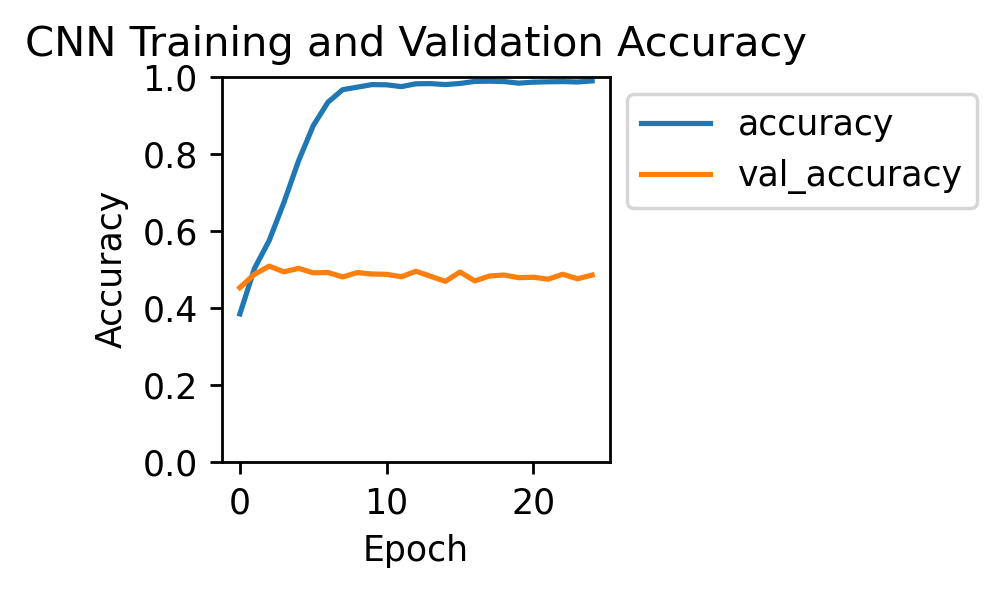

In [25]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('CNN Training and Validation Accuracy')

# 2.3 SVM Model

In [26]:
from  sklearn.decomposition  import  PCA

k = 100
pca = PCA(n_components=k)

# new datasets for after PCA
X_train_pca = pca.fit_transform(SVM_X_train)
X_test_pca = pca.transform(SVM_X_test)

In [27]:
from sklearn.svm import SVC

svm = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
svm = svm.fit(X_train_pca, SVM_y_train)

In [28]:
y_predict_SVM = svm.predict(X_test_pca)

In [29]:
from sklearn.metrics import accuracy_score
SVM_score = str(accuracy_score(SVM_y_test, y_predict_SVM))
print('Accuracy for SVM: ' + SVM_score)

Accuracy for SVM: 0.4228491814698711


# 2.4 VGG-16 Model

In [30]:
X_train_3D_RGB = []
X_test_3D_RGB = []
# need to resize to use the VGG16 from keras
# since our data is black and white, we copy the pixel values 3 times
for img in X_train_3D:
    X_train_3D_RGB.append(np.repeat(img, 3, axis = -1))
for img in X_test_3D:
    X_test_3D_RGB.append(np.repeat(img, 3, axis = -1))
X_train_3D_RGB = np.array(X_train_3D_RGB)
X_test_3D_RGB = np.array(X_test_3D_RGB)

In [31]:
X_train_3D_RGB.shape

(20096, 48, 48, 3)

In [32]:
from keras.src.applications import VGG16
from keras import models


## TRANSFER LEARNING WITH VGG-16
##
# Load the pre-trained VGG16 model
model_16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# Freeze the layers of the pre-trained model so that they are not trained again during fine-tuning
model_16.trainable=False

## OUR NEW MODEL TO BASE OFF VGG-16
##
# Create the new layers
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(1000, activation='relu')
dropout_layer_1 = layers.Dropout(0.25)
dense_layer_2 = layers.Dense(500, activation='relu')
dropout_layer_1 = layers.Dropout(0.25)
output_layer = layers.Dense(7, activation='softmax')

new_model = models.Sequential([model_16, flatten_layer, dense_layer_1, dense_layer_2, output_layer])

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
## Fine Tuning the new model
##
history_vgg16 = new_model.fit(X_train_3D_RGB, y_train_cat, batch_size=32, epochs=25,
                              validation_data=(X_test_3D_RGB, y_test_cat))

2024-05-09 17:32:24.375065: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 555614208 exceeds 10% of free system memory.
2024-05-09 17:32:26.877392: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 555614208 exceeds 10% of free system memory.


Epoch 1/25
628/628 [==============================] - 13s 16ms/step - loss: 1.5988 - accuracy: 0.3718 - val_loss: 1.5391 - val_accuracy: 0.4015
Epoch 2/25
628/628 [==============================] - 8s 12ms/step - loss: 1.4872 - accuracy: 0.4245 - val_loss: 1.5015 - val_accuracy: 0.4201
Epoch 3/25
628/628 [==============================] - 8s 13ms/step - loss: 1.4103 - accuracy: 0.4592 - val_loss: 1.4760 - val_accuracy: 0.4362
Epoch 4/25
628/628 [==============================] - 8s 12ms/step - loss: 1.3308 - accuracy: 0.4921 - val_loss: 1.5003 - val_accuracy: 0.4349
Epoch 5/25
628/628 [==============================] - 8s 12ms/step - loss: 1.2386 - accuracy: 0.5297 - val_loss: 1.5131 - val_accuracy: 0.4412
Epoch 6/25
628/628 [==============================] - 8s 12ms/step - loss: 1.1409 - accuracy: 0.5695 - val_loss: 1.5709 - val_accuracy: 0.4526
Epoch 7/25
628/628 [==============================] - 8s 12ms/step - loss: 1.0359 - accuracy: 0.6106 - val_loss: 1.6530 - val_accuracy: 0.445

In [34]:
# Access the final accuracy from the history object
VGG_train_accuracy = history_vgg16.history['accuracy'][-1]
VGG_val_accuracy = history_vgg16.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {VGG_train_accuracy}")
print(f"Final Validation Accuracy: {VGG_val_accuracy}")

Final Training Accuracy: 0.9563594460487366
Final Validation Accuracy: 0.4579124450683594


Text(0.5, 1.0, 'VGG-16 Training and Validation Accuracy')

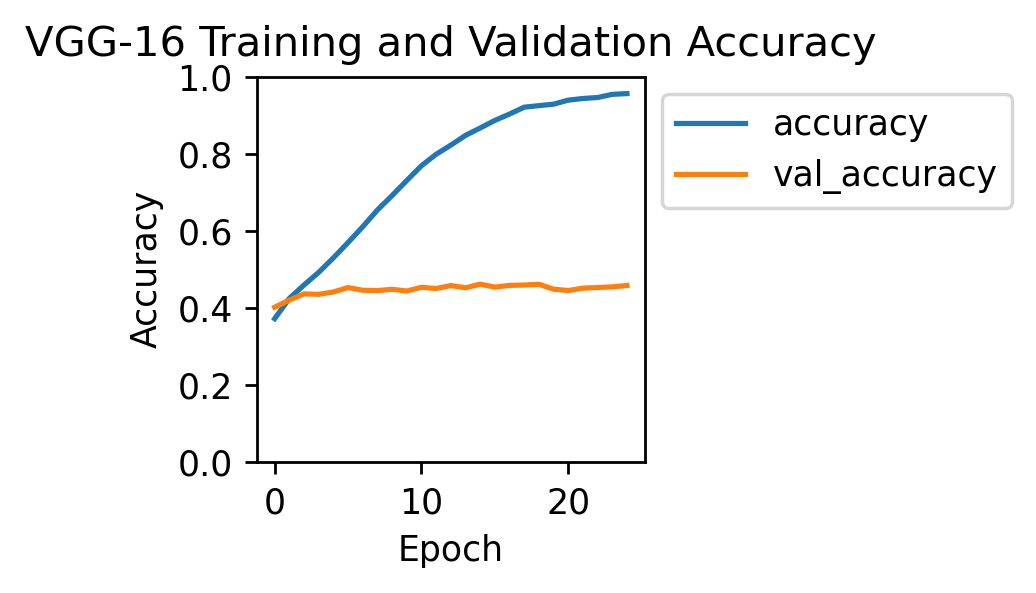

In [35]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('VGG-16 Training and Validation Accuracy')


# 2.5 LeNet

In [36]:
# LeNet5 Model
model_LeNet = keras.Sequential()

model_LeNet.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_LeNet.add(layers.AveragePooling2D())

model_LeNet.add(layers.Flatten())

model_LeNet.add(layers.Dense(units=120, activation='relu'))
model_LeNet.add(layers.Dense(units=84, activation='relu'))
model_LeNet.add(layers.Dense(units=10, activation = 'softmax'))

In [37]:
model_LeNet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 46, 6)         60        
                                                                 
 average_pooling2d (Average  (None, 23, 23, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 10, 10, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [38]:
model_LeNet.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'], run_eagerly=True)

In [39]:
history_LeNet = model_LeNet.fit(X_train_3D, y_train, epochs=25, 
                    validation_data=(X_test_3D, y_test))

Epoch 1/25
628/628 [==============================] - 29s 43ms/step - loss: 1.6466 - accuracy: 0.3532 - val_loss: 1.5444 - val_accuracy: 0.4047
Epoch 2/25
628/628 [==============================] - 27s 43ms/step - loss: 1.4670 - accuracy: 0.4352 - val_loss: 1.4762 - val_accuracy: 0.4297
Epoch 3/25
628/628 [==============================] - 24s 39ms/step - loss: 1.3597 - accuracy: 0.4838 - val_loss: 1.4054 - val_accuracy: 0.4566
Epoch 4/25
628/628 [==============================] - 25s 40ms/step - loss: 1.2734 - accuracy: 0.5144 - val_loss: 1.3712 - val_accuracy: 0.4735
Epoch 5/25
628/628 [==============================] - 27s 42ms/step - loss: 1.1919 - accuracy: 0.5494 - val_loss: 1.3640 - val_accuracy: 0.4731
Epoch 6/25
628/628 [==============================] - 25s 40ms/step - loss: 1.0975 - accuracy: 0.5891 - val_loss: 1.3906 - val_accuracy: 0.4933
Epoch 7/25
628/628 [==============================] - 26s 41ms/step - loss: 1.0109 - accuracy: 0.6190 - val_loss: 1.4050 - val_accuracy:

In [40]:
# Access the final accuracy from the history object
LeNet_train_accuracy = history_LeNet.history['accuracy'][-1]
Le_Net_val_accuracy = history_LeNet.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {LeNet_train_accuracy}")
print(f"Final Validation Accuracy: {Le_Net_val_accuracy}")

Final Training Accuracy: 0.9639729261398315
Final Validation Accuracy: 0.4651108682155609


Text(0.5, 1.0, 'LeNet Training and Validation Accuracy')

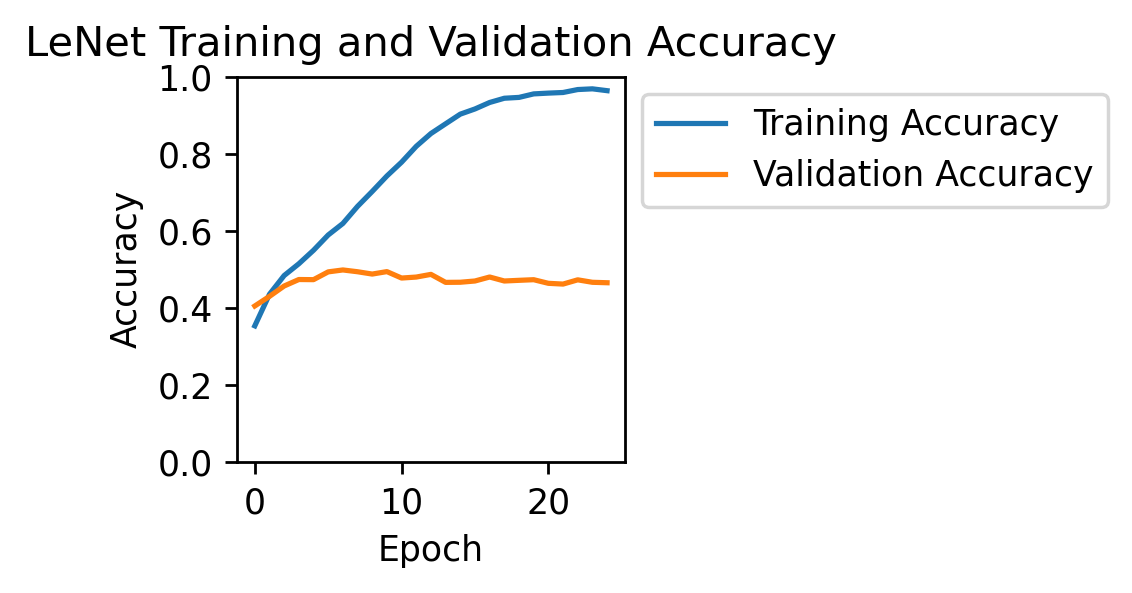

In [41]:
fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(history_LeNet.history['accuracy'], label='Training Accuracy')
plt.plot(history_LeNet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('LeNet Training and Validation Accuracy')

# 2.6 DenseNet

In [42]:
# "Sequential" models let us define a stack of neural network layers
from keras import Sequential
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import layers
from keras.src.layers import GlobalAveragePooling2D
from keras.src.applications import DenseNet121


## TRANSFER LEARNING WITH DENSENET
##
# Load the DenseNet121 model without the top layer (include_top=False)
DenseNet = DenseNet121(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# Freeze the base model layers
DenseNet.trainable = False


## OUR NEW MODEL TO BASE OFF DENSENET
##
# Create a new model on top of the pre-trained DenseNet121 base model

pooling_layer = layers.GlobalAveragePooling2D()
dense_layer_1 = layers.Dense(1000, activation='relu')
dropout_layer_1 = layers.Dropout(0.25)
dense_layer_2 = layers.Dense(500, activation='relu')
dropout_layer_2 = layers.Dropout(0.25)
output_layer = layers.Dense(7, activation='softmax') # Assuming 7 classes for emotions


model = Sequential([DenseNet, pooling_layer, dense_layer_1, dense_layer_2, output_layer])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model
DenseNet_history = model.fit(X_train_3D_RGB, y_train, epochs=25, validation_data=(X_test_3D_RGB, y_test))

2024-05-09 17:46:53.592066: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 555614208 exceeds 10% of free system memory.
2024-05-09 17:46:54.881984: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 555614208 exceeds 10% of free system memory.


Epoch 1/25
628/628 [==============================] - 28s 35ms/step - loss: 1.6069 - accuracy: 0.3699 - val_loss: 1.5278 - val_accuracy: 0.4190
Epoch 2/25
628/628 [==============================] - 19s 31ms/step - loss: 1.4880 - accuracy: 0.4237 - val_loss: 1.5062 - val_accuracy: 0.4251
Epoch 3/25
628/628 [==============================] - 23s 36ms/step - loss: 1.4344 - accuracy: 0.4459 - val_loss: 1.4827 - val_accuracy: 0.4289
Epoch 4/25
628/628 [==============================] - 20s 33ms/step - loss: 1.3818 - accuracy: 0.4687 - val_loss: 1.5103 - val_accuracy: 0.4252
Epoch 5/25
628/628 [==============================] - 21s 33ms/step - loss: 1.3319 - accuracy: 0.4888 - val_loss: 1.5074 - val_accuracy: 0.4341
Epoch 6/25
628/628 [==============================] - 20s 32ms/step - loss: 1.2772 - accuracy: 0.5140 - val_loss: 1.4661 - val_accuracy: 0.4473
Epoch 7/25
628/628 [==============================] - 19s 31ms/step - loss: 1.2131 - accuracy: 0.5408 - val_loss: 1.5204 - val_accuracy:

In [44]:
# Get the training and validation accuracy
densenet_train_accuracy = DenseNet_history.history['accuracy']
densenet_val_accuracy = DenseNet_history.history['val_accuracy']

# Get the training and validation loss
train_loss = DenseNet_history.history['loss']
val_loss = DenseNet_history.history['val_loss']

In [45]:
# Print the accuracy and loss values 
print("Training Accuracy:", densenet_train_accuracy[-1])  # Accuracy of the last epoch
print("Validation Accuracy:", densenet_val_accuracy[-1])  # Validation accuracy of the last epoch
print("Training Loss:", train_loss[-1])  # Loss of the last epoch
print("Validation Loss:", val_loss[-1])  # Validation loss of the last epoch

Training Accuracy: 0.9257563948631287
Validation Accuracy: 0.4497852027416229
Training Loss: 0.22189512848854065
Validation Loss: 3.5693371295928955


Text(0.5, 1.0, 'DenseNet Training and Validation Accuracy')

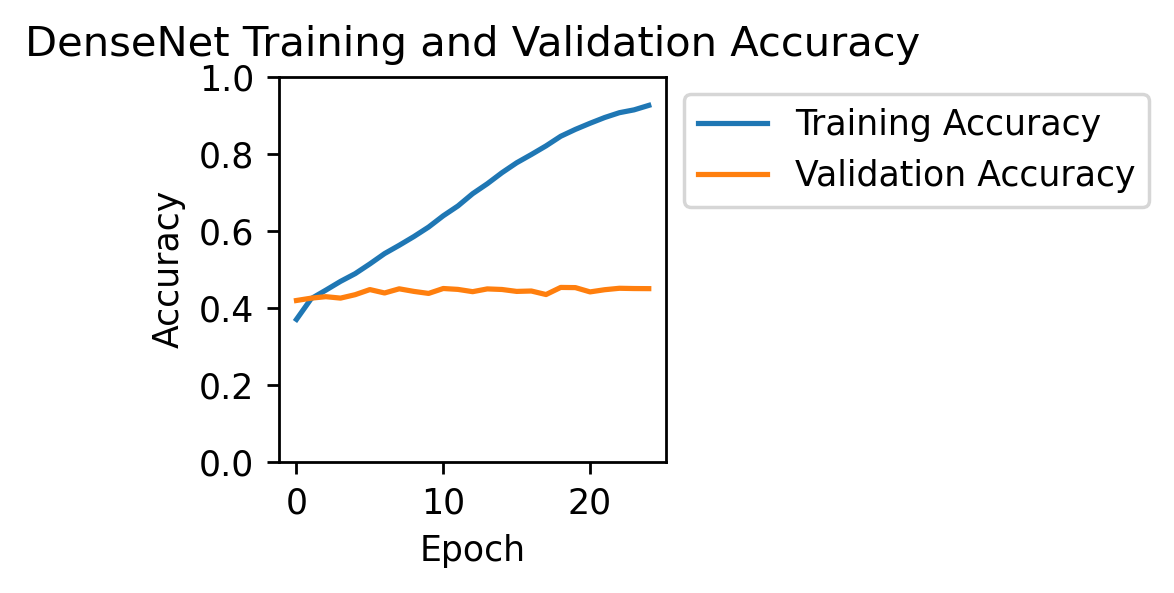

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(2,2), dpi=250)
plt.plot(densenet_train_accuracy, label='Training Accuracy')
plt.plot(densenet_val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('DenseNet Training and Validation Accuracy')

# 3 Final Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

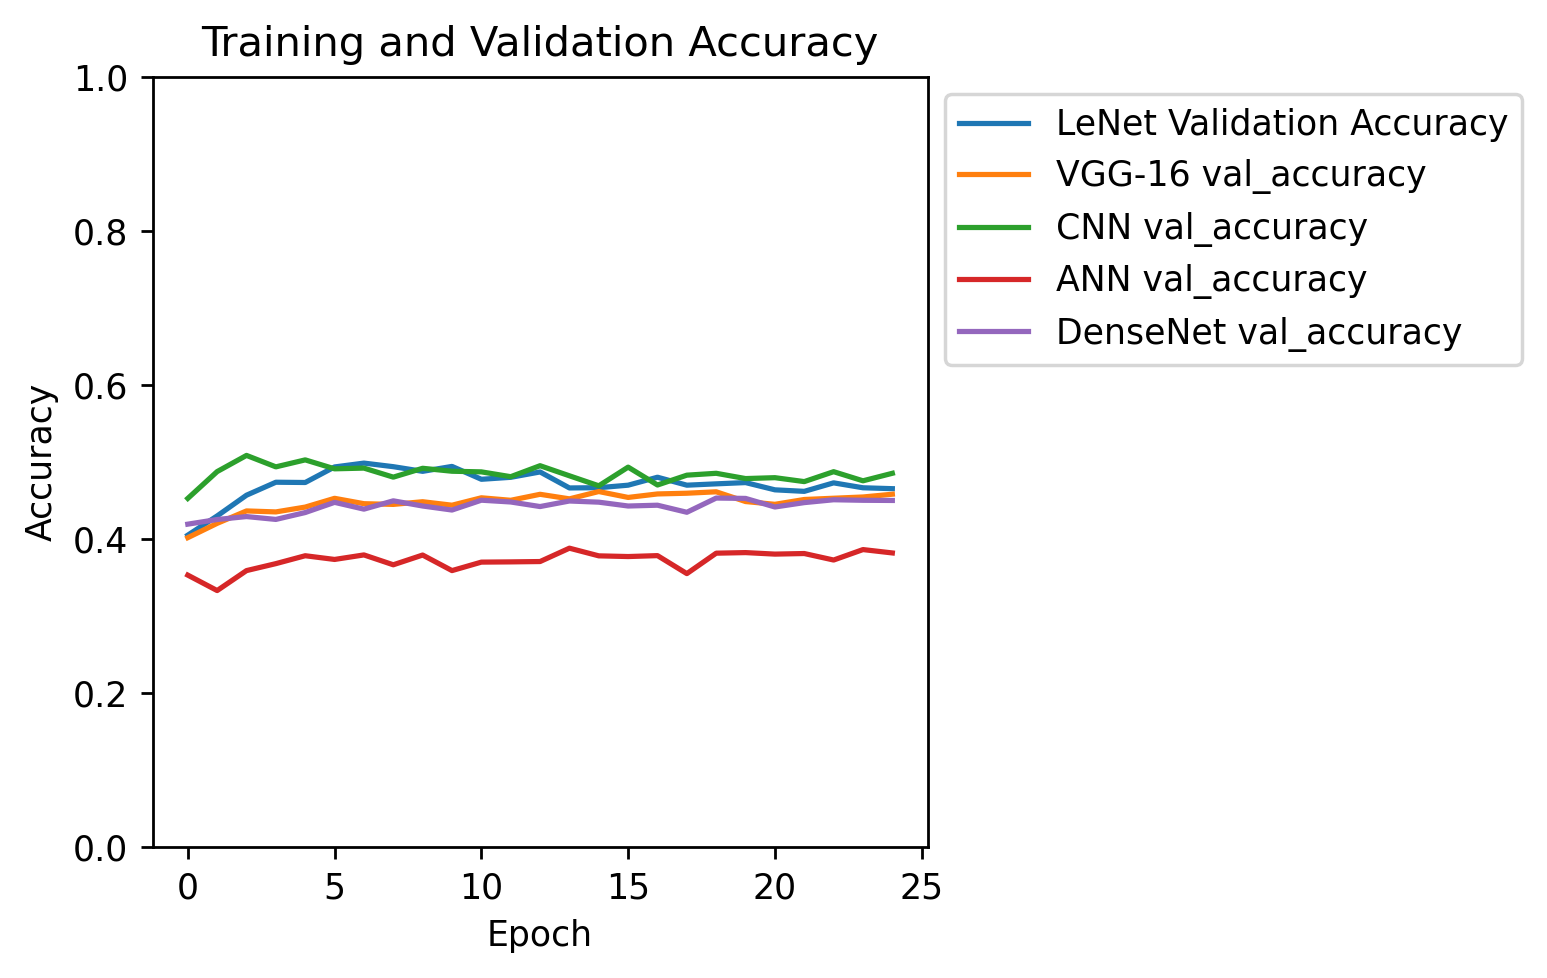

In [47]:
fig = plt.figure(figsize=(4,4), dpi=250)

plt.plot(history_LeNet.history['val_accuracy'], label='LeNet Validation Accuracy')

plt.plot(history_vgg16.history['val_accuracy'], label = 'VGG-16 val_accuracy')

plt.plot(history_cnn.history['val_accuracy'], label = 'CNN val_accuracy')

plt.plot(fitted_ANN_model.history['val_accuracy'], label = 'ANN val_accuracy')

plt.plot(DenseNet_history.history['val_accuracy'], label = 'DenseNet val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Training and Validation Accuracy')

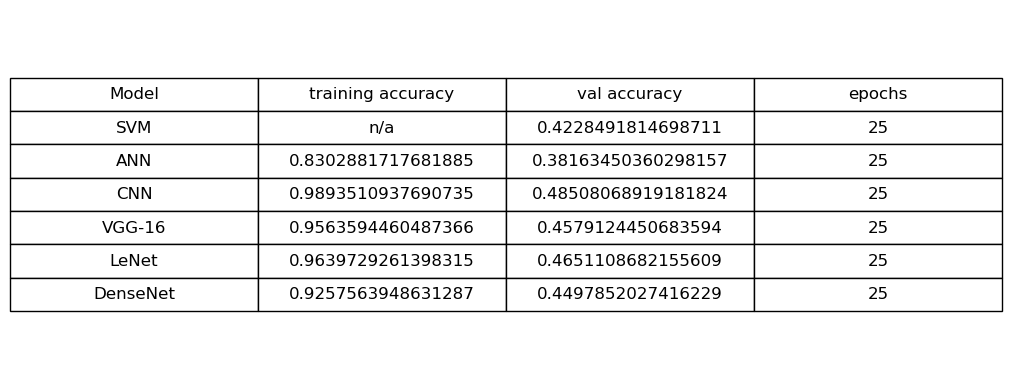

In [48]:
# Data for the table
data = [
    ['Model', 'training accuracy', 'val accuracy', 'epochs'],
    ['SVM', 'n/a', SVM_score, 25],
    ['ANN', ANN_train_accuracy, ANN_val_accuracy, 25],
    ['CNN', CNN_train_accuracy, CNN_val_accuracy, 25],
    ['VGG-16',VGG_train_accuracy, VGG_val_accuracy, 25],
    ['LeNet', LeNet_train_accuracy, Le_Net_val_accuracy, 25],
    ['DenseNet', densenet_train_accuracy[-1], densenet_val_accuracy[-1], 25]
]

# Create a figure and axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create the table without column labels
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Set font size
table.set_fontsize(14)

# Set table properties
table.scale(2, 2)  # Adjust scale as needed

# Show the table
plt.show()
